In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime 

In [43]:
#clean up csv with wanted features
df=pd.read_csv('df_final.csv',index_col=[0])

In [33]:
#with all features 
df_all_features = pd.read_csv('df_merged_final.csv',index_col=[0])

In [44]:
#using pickle
pickle_in=open("df_final.pickle","wb")
pickle.dump(df,pickle_in)
pickle_in.close()

pickle_out=open('df_final.pickle',"rb")
df=pickle.load(pickle_out)

In [45]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,DestinfeelslikeC,DestinheatindexC,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,-21,-14,-21,21,58,85,0.2,-12,10,14
1,2018-01-13,DL,DL_CODESHARE,DL,3512,9E,N820AY,3512,15380,TVC,...,-17,-10,-17,25,60,65,0.0,-9,9,19
2,2018-01-14,DL,DL_CODESHARE,DL,3512,9E,N820AY,3512,15380,TVC,...,-12,-8,-12,12,50,73,0.1,-7,10,9
3,2018-01-15,DL,DL_CODESHARE,DL,3512,9E,N686BR,3512,15380,TVC,...,-14,-8,-14,17,99,83,2.6,-5,6,13
4,2018-01-16,DL,DL_CODESHARE,DL,3512,9E,N8836A,3512,15380,TVC,...,-15,-9,-15,18,99,88,0.6,-8,8,13


In [46]:
df.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
crs_arr_time           0
dup                    0
crs_elapsed_time       0
flights                0
distance               0
arr_time_time          0
OriginmaxtempC         0
OriginmintempC         0
Origintotalsnow_cm     0
Originsunhour          0
OriginfeelslikeC       0
OriginheatindexC       0
OriginwindchillC       0
OriginwindgustKmph     0
Origincloudcover       0
Originhumidity         0
OriginprecipMM         0
OrigintempC            0
Originvisibility       0
OriginwindspeedKmph    0
DestinmaxtempC         0
DestinmintempC         0
Destintotalsnow_cm     0
Destinsunhour          0
DestinfeelslikeC       0


#### departure vs arr_delay

In [34]:
dep_mean=df_all_features.dep_delay.mean()

In [35]:
arr_mean=df_all_features.arr_delay.mean()

#### by airline 
* generate arr_dely average by each airline and merge df to df_combined

In [36]:
avg_delay_all = arr_mean

In [53]:
df_airline_delay = pd.DataFrame({'delay mean_by_airline' : df_all_features.groupby([ 'op_unique_carrier'] )['arr_delay'].mean()}).reset_index()


In [54]:
df_airline_delay.head()

,op_unique_carrier,delay mean_by_airline
0,9E,4.390513
1,9K,-3.754545
2,AA,1.194532
3,AS,-4.464361
4,AX,17.721332


In [56]:
#groupby airline and airport
df_combined = pd.merge(df, df_airline_delay, how='inner', on=['op_unique_carrier'])


In [57]:
df_combined.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,DestinheatindexC,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph,delay mean_by_airline
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,-14,-21,21,58,85,0.2,-12,10,14,4.390513
1,2018-01-13,DL,DL_CODESHARE,DL,3512,9E,N820AY,3512,15380,TVC,...,-10,-17,25,60,65,0.0,-9,9,19,4.390513
2,2018-01-14,DL,DL_CODESHARE,DL,3512,9E,N820AY,3512,15380,TVC,...,-8,-12,12,50,73,0.1,-7,10,9,4.390513
3,2018-01-15,DL,DL_CODESHARE,DL,3512,9E,N686BR,3512,15380,TVC,...,-8,-14,17,99,83,2.6,-5,6,13,4.390513
4,2018-01-16,DL,DL_CODESHARE,DL,3512,9E,N8836A,3512,15380,TVC,...,-9,-15,18,99,88,0.6,-8,8,13,4.390513


In [58]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fl_date                715371 non-null  object 
 1   mkt_unique_carrier     715371 non-null  object 
 2   branded_code_share     715371 non-null  object 
 3   mkt_carrier            715371 non-null  object 
 4   mkt_carrier_fl_num     715371 non-null  int64  
 5   op_unique_carrier      715371 non-null  object 
 6   tail_num               715371 non-null  object 
 7   op_carrier_fl_num      715371 non-null  int64  
 8   origin_airport_id      715371 non-null  int64  
 9   origin                 715371 non-null  object 
 10  origin_city_name       715371 non-null  object 
 11  dest_airport_id        715371 non-null  int64  
 12  dest                   715371 non-null  object 
 13  dest_city_name         715371 non-null  object 
 14  crs_dep_time           715371 non-nu

In [59]:
df_combined.drop('arr_time_time',axis=1,inplace=True)

In [60]:
#check again
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fl_date                715371 non-null  object 
 1   mkt_unique_carrier     715371 non-null  object 
 2   branded_code_share     715371 non-null  object 
 3   mkt_carrier            715371 non-null  object 
 4   mkt_carrier_fl_num     715371 non-null  int64  
 5   op_unique_carrier      715371 non-null  object 
 6   tail_num               715371 non-null  object 
 7   op_carrier_fl_num      715371 non-null  int64  
 8   origin_airport_id      715371 non-null  int64  
 9   origin                 715371 non-null  object 
 10  origin_city_name       715371 non-null  object 
 11  dest_airport_id        715371 non-null  int64  
 12  dest                   715371 non-null  object 
 13  dest_city_name         715371 non-null  object 
 14  crs_dep_time           715371 non-nu

In [ ]:
df_combined['arr_time']=

#### Correlation matrix

In [81]:
df_combined.iloc[:,0:20].columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [69]:
#Computing correlation among the columns
correlation_data = df_combined.iloc[:,0:20]
corr = correlation_data.corr() 

In [72]:
df_combined.flights.unique()


array([1.])

/var/folders/46/dbkcnsnj0mj32m5rwc64xzcr0000gn/T/ipykernel_7489/1117180436.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

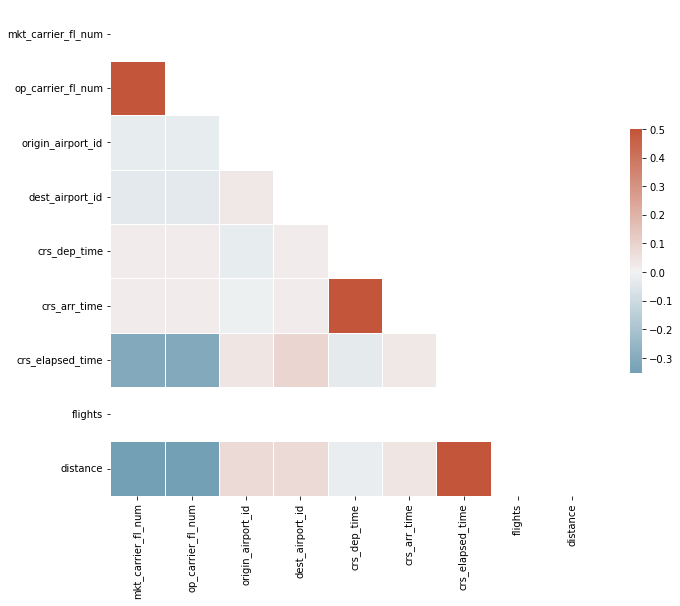

In [78]:

f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap=cmap,vmax=.5, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

#### Drop unwanted features

In [21]:
y=df_combined['arr_delay']

In [22]:
lst=['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier_fl_num','mkt_carrier', 
     'op_unique_carrier','op_carrier_fl_num', 'tail_num', 'origin','origin_city_name',
     'origin_airport_id', 'dest_city_name','dest','dest_airport_id', 'crs_arr_time',
     'crs_dep_time',   'dup','crs_elapsed_time','distance','flights']


delay_cols = ['arr_delay',
    'late_aircraft_delay',
    'security_delay',
    'nas_delay',
    'weather_delay',
    'carrier_delay',
    'cancelled',
    'cancellation_code',
    'actual_elapsed_time'
    'air_time',
    'taxi_in',
    'arr_time',
    'wheels_on',
    'dep_delay',
    'taxi_out',
    'wheels_off',
    'dep_time',
    'diverted',
    'longest_add_gtime',
    'total_add_gtime',
    'first_dep_time'
    ]

delete=['dep_time','dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','arr_time', 'arr_delay', 'cancelled', 'diverted', 
'actual_elapsed_time', 'air_time']


In [23]:
df_combined.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'arr_time_time', 'OriginmaxtempC', 'OriginmintempC',
       'Origintotalsnow_cm', 'Originsunhour', 'OriginfeelslikeC',
       'OriginheatindexC', 'OriginwindchillC', 'OriginwindgustKmph',
       'Origincloudcover', 'Originhumidity', 'OriginprecipMM', 'OrigintempC',
       'Originvisibility', 'OriginwindspeedKmph', 'DestinmaxtempC',
       'DestinmintempC', 'Destintotalsnow_cm', 'Destinsunhour',
       'DestinfeelslikeC', 'DestinheatindexC', 'Destinwindchil

In [24]:
df_combined_clean=df_combined.drop(delete,axis=1)

In [25]:
df_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fl_date                715371 non-null  datetime64[ns]
 1   mkt_unique_carrier     715371 non-null  object        
 2   branded_code_share     715371 non-null  object        
 3   mkt_carrier            715371 non-null  object        
 4   mkt_carrier_fl_num     715371 non-null  int64         
 5   op_unique_carrier      715371 non-null  object        
 6   tail_num               715371 non-null  object        
 7   op_carrier_fl_num      715371 non-null  int64         
 8   origin_airport_id      715371 non-null  int64         
 9   origin                 715371 non-null  object        
 10  origin_city_name       715371 non-null  object        
 11  dest_airport_id        715371 non-null  int64         
 12  dest                   715371 non-null  obje

In [26]:
df_combined_clean.fl_date

0        2018-01-01
1        2018-01-13
2        2018-01-14
3        2018-01-15
4        2018-01-16
            ...    
715366   2019-01-29
715367   2019-01-29
715368   2019-01-31
715369   2019-01-26
715370   2019-01-30
Name: fl_date, Length: 715371, dtype: datetime64[ns]

In [78]:
df_combined_clean.dtypes

fl_date                   object
mkt_unique_carrier        object
branded_code_share        object
mkt_carrier               object
mkt_carrier_fl_num         int64
op_unique_carrier         object
tail_num                  object
op_carrier_fl_num          int64
origin_airport_id          int64
origin                    object
origin_city_name          object
dest_airport_id            int64
dest                      object
dest_city_name            object
crs_dep_time               int64
crs_arr_time               int64
dup                       object
crs_elapsed_time         float64
flights                  float64
distance                 float64
OriginmaxtempC             int64
OriginmintempC             int64
Origintotalsnow_cm       float64
Originsunhour            float64
OriginfeelslikeC           int64
OriginheatindexC           int64
OriginwindchillC           int64
OriginwindgustKmph         int64
Origincloudcover           int64
Originhumidity             int64
Originprec

#### Datetime conversion

In [84]:

#Converting flight date to a Datetime object and then computing which weekday the flight was on
df_combined_clean['fl_date']= pd.to_datetime(df_combined_clean['fl_date'])


In [92]:
df_combined_clean['year']=df_combined_clean.fl_date.dt.year

In [93]:
df_combined_clean['Month']=df_combined_clean.fl_date.dt.month

In [94]:
df_combined_clean['Day']=df_combined_clean.fl_date.dt.day

In [96]:
df_combined_clean.drop('fl_date',axis=1, inplace=True)

In [98]:
df_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mkt_unique_carrier     715371 non-null  object 
 1   branded_code_share     715371 non-null  object 
 2   mkt_carrier            715371 non-null  object 
 3   mkt_carrier_fl_num     715371 non-null  int64  
 4   op_unique_carrier      715371 non-null  object 
 5   tail_num               715371 non-null  object 
 6   op_carrier_fl_num      715371 non-null  int64  
 7   origin_airport_id      715371 non-null  int64  
 8   origin                 715371 non-null  object 
 9   origin_city_name       715371 non-null  object 
 10  dest_airport_id        715371 non-null  int64  
 11  dest                   715371 non-null  object 
 12  dest_city_name         715371 non-null  object 
 13  crs_dep_time           715371 non-null  int64  
 14  crs_arr_time           715371 non-nu

In [85]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(column):
    if pd.isnull(column):
        return np.nan
    else:
        if column == 2400: column = 0
        column = "{0:04d}".format(int(column))
        heure = datetime.time(int(column[0:2]), int(column[2:4]))
        return heure

#### Dealing with categorical data

In [99]:
numerical = list(df_combined_clean.dtypes[df_combined_clean.dtypes != 'object'].index)

categorical = list(df_combined_clean.dtypes[df_combined_clean.dtypes == 'object'].index)

In [100]:
categorical

['mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'op_unique_carrier',
 'tail_num',
 'origin',
 'origin_city_name',
 'dest',
 'dest_city_name',
 'dup']

In [91]:
df_combined_clean['op_unique_carrier'].nunique()

28

In [82]:
from sklearn import preprocessing

In [84]:
le = preprocessing.LabelEncoder()
new=le.fit_transform(df_combined['op_unique_carrier'])

In [88]:
df_label=df_combined_clean.copy()

In [89]:
df_label['op_unique_carrier']=new

In [ ]:
# for col in categorical_columns:
#     df_combined_clean_encode = pd.get_dummies(df_combined_clean[col],prefix_sep = '_')
#     df_2020 = df_2020.drop([col],axis=1)

# df_2020 = pd.concat([df_2020, X_encoded], axis=1)

In [103]:
df_combined_clean.drop('arr_time_time',axis=1,inplace=True)

In [104]:
df_combined_clean.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'OriginmaxtempC', 'OriginmintempC', 'Origintotalsnow_cm',
       'Originsunhour', 'OriginfeelslikeC', 'OriginheatindexC',
       'OriginwindchillC', 'OriginwindgustKmph', 'Origincloudcover',
       'Originhumidity', 'OriginprecipMM', 'OrigintempC', 'Originvisibility',
       'OriginwindspeedKmph', 'DestinmaxtempC', 'DestinmintempC',
       'Destintotalsnow_cm', 'Destinsunhour', 'DestinfeelslikeC',
       'DestinheatindexC', 'DestinwindchillC', 'DestinwindgustKmph',
       'Destincloudcover', 'Destinhumidity', 'DestinprecipMM', 'DestintempC',
       'Destinvisibility', 'DestinwindspeedKmph', 'delay mean_by_airline',
       'year', 'Month'

In [106]:
weather_cols=['OriginmaxtempC', 'OriginmintempC', 'Origintotalsnow_cm',
       'Originsunhour', 'OriginfeelslikeC', 'OriginheatindexC',
       'OriginwindchillC', 'OriginwindgustKmph', 'Origincloudcover',
       'Originhumidity', 'OriginprecipMM', 'OrigintempC', 'Originvisibility',
       'OriginwindspeedKmph', 'DestinmaxtempC', 'DestinmintempC',
       'Destintotalsnow_cm', 'Destinsunhour', 'DestinfeelslikeC',
       'DestinheatindexC', 'DestinwindchillC', 'DestinwindgustKmph',
       'Destincloudcover', 'Destinhumidity', 'DestinprecipMM', 'DestintempC',
       'Destinvisibility', 'DestinwindspeedKmph']

In [105]:
df_weather=df_combined_clean[['mkt_unique_carrier','OriginmaxtempC', 'OriginmintempC', 'Origintotalsnow_cm',
       'Originsunhour', 'OriginfeelslikeC', 'OriginheatindexC',
       'OriginwindchillC', 'OriginwindgustKmph', 'Origincloudcover',
       'Originhumidity', 'OriginprecipMM', 'OrigintempC', 'Originvisibility',
       'OriginwindspeedKmph', 'DestinmaxtempC', 'DestinmintempC',
       'Destintotalsnow_cm', 'Destinsunhour', 'DestinfeelslikeC',
       'DestinheatindexC', 'DestinwindchillC', 'DestinwindgustKmph',
       'Destincloudcover', 'Destinhumidity', 'DestinprecipMM', 'DestintempC',
       'Destinvisibility', 'DestinwindspeedKmph']]

In [109]:
df_combined_clean_noweather=df_combined_clean.drop(weather_cols,axis=1)

In [110]:
df_combined_clean_noweather.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'delay mean_by_airline', 'year', 'Month', 'Day'],
      dtype='object')

In [119]:
#drop city name 
city_drop=['origin','origin_city_name','dest', 'dest_city_name',
           'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num','mkt_unique_carrier']
drop_cont=['tail_num','op_carrier_fl_num','dup']


In [122]:
# df_combined_clean_noweather.drop(city_drop,axis=1,inplace=True)
# df_combined_clean_noweather.drop(drop_cont,axis=1,inplace=True)
df_combined_clean_noweather.drop('flights',axis=1,inplace=True)

In [123]:
df_combined_clean_noweather.columns

Index(['op_unique_carrier', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance',
       'delay mean_by_airline', 'year', 'Month', 'Day'],
      dtype='object')

In [124]:
df_combined_clean_noweather.head()

,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,delay mean_by_airline,year,Month,Day
0,9E,15380,11433,615,738,83.0,207.0,1.090909,2018,1,1
1,9E,15380,11433,1746,1906,80.0,207.0,1.090909,2018,1,13
2,9E,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,14
3,9E,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,15
4,9E,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,16


In [125]:
df_withdummies=pd.get_dummies(df_combined_clean_noweather)

In [126]:
df_withdummies.head()

,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,delay mean_by_airline,year,Month,Day,...,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,15380,11433,615,738,83.0,207.0,1.090909,2018,1,1,...,0,0,0,0,0,0,0,0,0,0
1,15380,11433,1746,1906,80.0,207.0,1.090909,2018,1,13,...,0,0,0,0,0,0,0,0,0,0
2,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,14,...,0,0,0,0,0,0,0,0,0,0
3,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,15,...,0,0,0,0,0,0,0,0,0,0
4,15380,11433,1746,1909,83.0,207.0,1.090909,2018,1,16,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df_withdummies.to_csv('df_withdummies.csv')

In [128]:
#using pickle
pickle_in=open("df_withdummies.pickle","wb")
pickle.dump(df_withdummies,pickle_in)
pickle_in.close()

pickle_out=open('df_withdummies.pickle',"rb")
df_withdummies=pickle.load(pickle_out)